In [1]:
import pandas as pd
from dl_portfolio.cluster import get_cluster_labels
import seaborn as sns
from dl_portfolio.cluster import consensus_matrix
import matplotlib.pyplot as plt
from dl_portfolio.cluster import rand_score_permutation
import numpy as np

In [2]:
SAVE=False
SAVE_DIR = "paper_result_update/ae"
dirs = ["encoding_2", "encoding_3", "encoding_4", "encoding_5"]

# Dataset 1

encoding_2
[0.5913070412407007, 0.31762835937310085]
encoding_3
[0.731556435206481, 0.20170446167819364]
encoding_4
[0.756194778416773, 0.14509134743582644]
encoding_5
[0.7060751819971968, 0.14522944091247267]


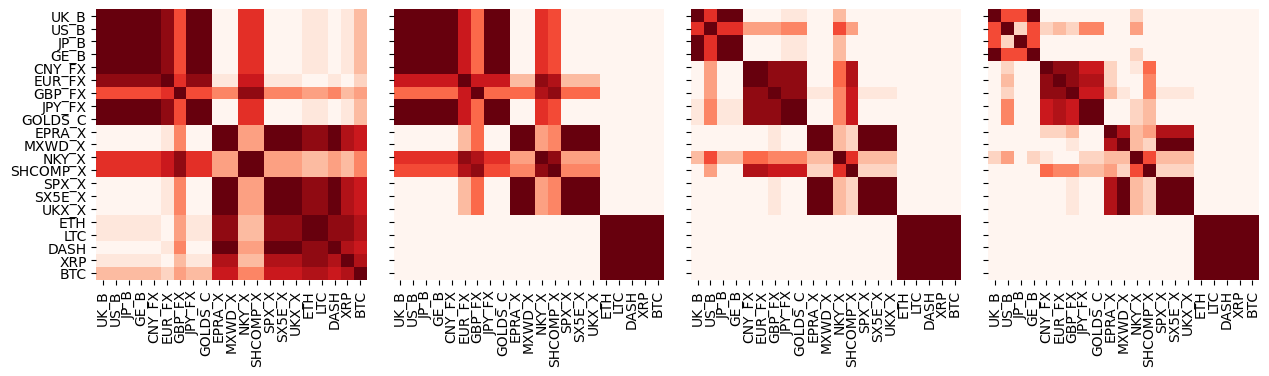

In [5]:
save = SAVE

dataset="dataset1"
ari = []
fig, axs = plt.subplots(1, len(dirs), sharex=True, sharey=True, figsize=(15, 4))
for i, dir_ in enumerate(dirs):
    print(dir_)
    cluster_assignment = {}
    predicted_labels = {}
    for cv in range(12):
        decoder = pd.read_pickle(f"optimal_cluster_ae_{dataset}/{dir_}/{cv}/decoder_weights.p")
        cluster_assignment[cv], predicted_labels[cv] = get_cluster_labels(
            decoder
        )
        
    cv_rand = rand_score_permutation(predicted_labels)
    trii = np.triu_indices(len(cv_rand), k=1)
    ari.append([np.mean(cv_rand[trii]), np.std(cv_rand[trii])])
    print(ari[-1])
    
    heat = sns.heatmap(consensus_matrix(predicted_labels), ax=axs[i], cbar=False,
                       square=True, xticklabels=predicted_labels[0].index, cmap="Reds")
plt.subplots_adjust(wspace=0.1)

if save:
    plt.savefig(f"{SAVE_DIR}/{dataset}_nmf_cons_mat.png",
                transparent=True,
                bbox_inches="tight")
plt.show()

ari = pd.DataFrame(ari, columns=["mean", "std"], index=dirs)
if save:
    ari.to_csv(f"{SAVE_DIR}/ari_{dataset}.csv")

In [10]:
[np.mean(pd.read_json(f"optimal_cluster_ae_{dataset}/{dir_}/evaluation.json").loc["test"]) for dir_ in dirs]

[0.7328404802059518,
 0.5842317020180667,
 0.5028703196530686,
 0.47697360088250007]

In [11]:
[np.std(pd.read_json(f"optimal_cluster_ae_{dataset}/{dir_}/evaluation.json").loc["test"]) for dir_ in dirs]

[0.33621359378404253,
 0.3238824199689529,
 0.31367831944581015,
 0.3147290897371509]

# Dataset 2

encoding_2
[0.5795206655724423, 0.3689377305120583]
encoding_3
[0.9228399623285075, 0.08413490197546282]
encoding_4
[0.7462063260184569, 0.14502268601019017]
encoding_5
[0.9152410507891933, 0.1007987586259241]


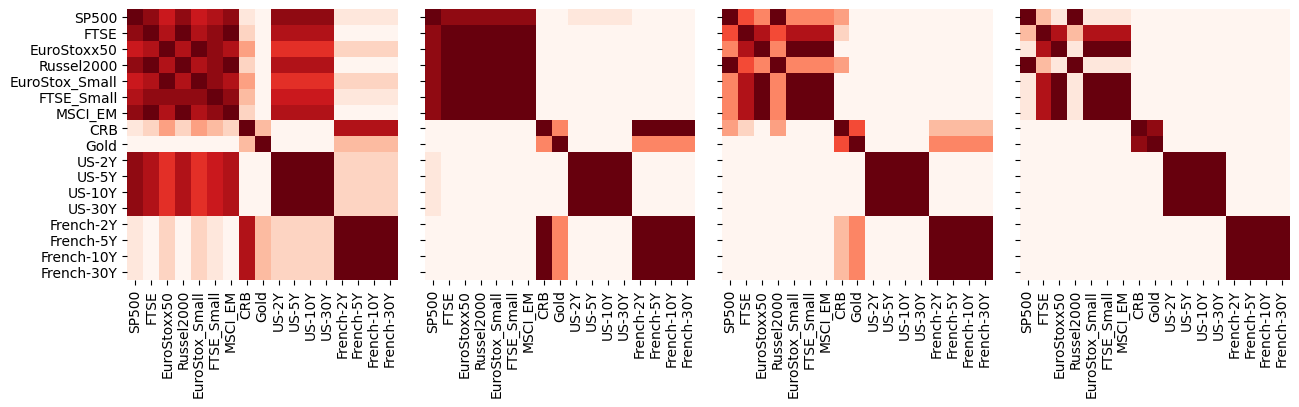

In [12]:
save = SAVE

dataset="dataset2"
ari = []
fig, axs = plt.subplots(1, len(dirs), sharex=True, sharey=True, figsize=(15, 4))
for i, dir_ in enumerate(dirs):
    print(dir_)
    cluster_assignment = {}
    predicted_labels = {}
    for cv in range(12):
        decoder = pd.read_pickle(f"optimal_cluster_ae_{dataset}/{dir_}/{cv}/decoder_weights.p")
        cluster_assignment[cv], predicted_labels[cv] = get_cluster_labels(
            decoder
        )
        
    cv_rand = rand_score_permutation(predicted_labels)
    trii = np.triu_indices(len(cv_rand), k=1)
    ari.append([np.mean(cv_rand[trii]), np.std(cv_rand[trii])])
    print(ari[-1])
    
    heat = sns.heatmap(consensus_matrix(predicted_labels), ax=axs[i], cbar=False,
                       square=True, xticklabels=predicted_labels[0].index, cmap="Reds")
plt.subplots_adjust(wspace=0.1)

if save:
    plt.savefig(f"{SAVE_DIR}/{dataset}_nmf_cons_mat.png",
                transparent=True,
                bbox_inches="tight")
plt.show()

ari = pd.DataFrame(ari, columns=["mean", "std"], index=dirs)
if save:
    ari.to_csv(f"{SAVE_DIR}/ari_{dataset}.csv")

In [13]:
[np.mean(pd.read_json(f"optimal_cluster_ae_{dataset}/{dir_}/evaluation.json").loc["test"]) for dir_ in dirs]

[0.4954338354264592,
 0.37064637722097177,
 0.3029298619558551,
 0.22878078072120892]

In [14]:
[np.std(pd.read_json(f"optimal_cluster_ae_{dataset}/{dir_}/evaluation.json").loc["test"]) for dir_ in dirs]

[0.32224008241472835,
 0.19896042967746308,
 0.1657134112976441,
 0.12407224025423903]